In [73]:
import matplotlib.pyplot as plt
import pandas
import numpy as np 
from scipy import stats
%matplotlib inline

In [2]:
data = pandas.read_csv('LINKEDIN.csv')
data[:5]

Type       Seconds      ORN  Side   Shares   Price   Shares_remaining
0    A  14964.748380   135129     B        4  203.05                  4
1    D  14999.906845   135129     B        4  203.05                  0
2    A  29242.549628  1795169     B       10  212.40                 10
3    D  29277.905859  1795169     B       10  212.40                  0
4    A  29280.177421  1803562     S       20  228.80                 20

In [3]:
executions = data[data.Type == 'E']

In [4]:
executions[:5]

Type       Seconds      ORN  Side   Shares   Price   Shares_remaining
7     E  29530.854972  1913662     B       25  218.00                  0
19    E  30478.918553  2482598     B       60  217.85                  0
31    E  31222.330620  3040821     B       50  218.00                  0
62    E  31782.985609  3197627     B       30  217.21                 70
63    E  31849.621870  3197627     B       50  217.21                 20

In [5]:
import math

def roundup(x):
    return int(math.ceil(x / 10.0)) * 10

In [ ]:
def removeZeros(binnedExecutions):
    

In [10]:
def getBinnedExecutions(windowLength = 10):
    startingTime = int(executions.iloc[0][' Seconds'])
    endingTime = roundup(executions.iloc[len(executions) -1][' Seconds'])
    totalExececutions = len(executions)
    totalWindows = (endingTime - startingTime) / windowLength
    windows = np.zeros(totalWindows)

    print 'Total Executions', totalExececutions
    print 'startingTime: ', startingTime
    print 'EndingTime: ', endingTime
    print 'Total Windows: ', totalWindows

    for i in range(0,len(executions), 1):
        currentSecond = int(executions.iloc[i][' Seconds'])
        indexToIncrement = int((currentSecond - startingTime) / windowLength)
        if (indexToIncrement >= len(windows)):
            break
        windows[indexToIncrement] += 1 
    
    return windows
    

#Test Data Binning

Total Executions 3553
startingTime:  29530
EndingTime:  59160
Total Windows:  246


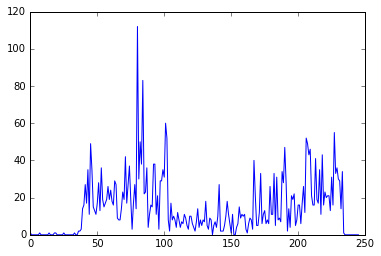

In [21]:
plt.plot(getBinnedExecutions(windowLength = 120)) # Window Sizes of Length 2 Minutes

Total Executions 3553
startingTime:  29530
EndingTime:  59160
Total Windows:  2963


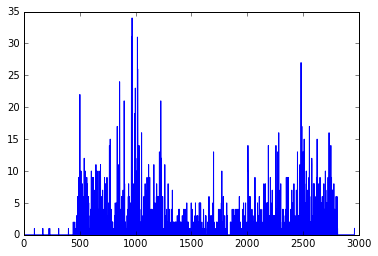

In [22]:
plt.plot(getBinnedExecutions(windowLength = 10)) # 10 Second Window Lenghts

#Initial Data Visualizations

Here I am creating execution windows of Length 30 and plotting it on a histogram with a total of 40 bins. These initial visualizations did not appear to match a poisson distribution. 

Total Executions 3553
startingTime:  29530
EndingTime:  59160
Total Windows:  987


(array([ 509.,  153.,  106.,   39.,   46.,   36.,   31.,    8.,   19.,
           6.,    7.,    7.,    3.,    7.,    1.,    1.,    3.,    1.,
           0.,    1.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    1.]),
 array([  0.   ,   1.725,   3.45 ,   5.175,   6.9  ,   8.625,  10.35 ,
         12.075,  13.8  ,  15.525,  17.25 ,  18.975,  20.7  ,  22.425,
         24.15 ,  25.875,  27.6  ,  29.325,  31.05 ,  32.775,  34.5  ,
         36.225,  37.95 ,  39.675,  41.4  ,  43.125,  44.85 ,  46.575,
         48.3  ,  50.025,  51.75 ,  53.475,  55.2  ,  56.925,  58.65 ,
         60.375,  62.1  ,  63.825,  65.55 ,  67.275,  69.   ]),
 <a list of 40 Patch objects>)

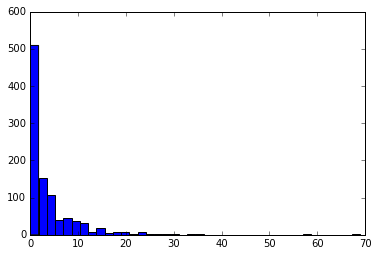

In [13]:
plt.hist(getBinnedExecutions(windowLength = 30), bins = 40)

Total Executions 3553
startingTime:  29530
EndingTime:  59160
Total Windows:  592


(array([ 218.,   96.,   64.,   48.,   29.,   34.,   16.,   19.,   17.,
          11.,    8.,    5.,    6.,    3.,    1.,    4.,    2.,    2.,
           1.,    0.,    2.,    1.,    2.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    1.]),
 array([  0.  ,   1.85,   3.7 ,   5.55,   7.4 ,   9.25,  11.1 ,  12.95,
         14.8 ,  16.65,  18.5 ,  20.35,  22.2 ,  24.05,  25.9 ,  27.75,
         29.6 ,  31.45,  33.3 ,  35.15,  37.  ,  38.85,  40.7 ,  42.55,
         44.4 ,  46.25,  48.1 ,  49.95,  51.8 ,  53.65,  55.5 ,  57.35,
         59.2 ,  61.05,  62.9 ,  64.75,  66.6 ,  68.45,  70.3 ,  72.15,  74.  ]),
 <a list of 40 Patch objects>)

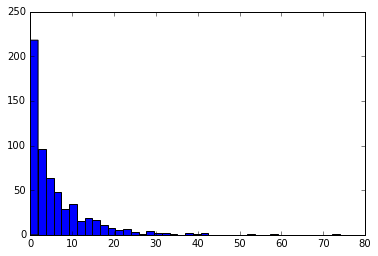

In [14]:
plt.hist(getBinnedExecutions(windowLength = 50), bins = 40)

#Starting To Look More Poisson

With larger window lengths and more granularity on the historgram, the distribution starts looking a lot more like a poisson distribution. 

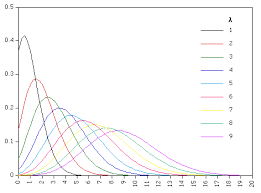

In [26]:
#Example Poisson Distribution
from IPython.display import Image
Image(filename='poisson2.png')

Total Executions 3553
startingTime:  29530
EndingTime:  59160
Total Windows:  246


(array([ 53.,   8.,   7.,   8.,   9.,   9.,   5.,  13.,  12.,  13.,   3.,
          4.,   6.,   4.,   9.,   8.,  10.,   1.,   6.,   2.,   3.,   1.,
          0.,   3.,   5.,   7.,   2.,   3.,   0.,   3.,   2.,   4.,   3.,
          4.,   0.,   1.,   1.,   1.,   2.,   0.,   0.,   2.,   0.,   2.,
          1.,   0.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([   0.  ,    1.12,    2.24,    3.36,    4.48,    5.6 ,    6.72,
           7.84,    8.96,   10.08,   11.2 ,   12.32,   13.44,   14.56,
          15.68,   16.8 ,   17.92,   19.04,   20.16,   21.28,   22.4 ,
          23.52,   24.64,   25.76,   26.88,   28.  ,   29.12,   30.24,
          31.36,   32.48,   33.6 ,

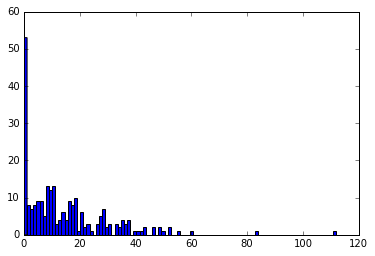

In [15]:
plt.hist(getBinnedExecutions(windowLength = 120), bins = 100)

Total Executions 3553
startingTime:  29530
EndingTime:  59160
Total Windows:  246


(array([ 42.,   8.,   7.,   8.,   9.,   9.,   5.,  13.,  12.,  13.,   3.,
          4.,   6.,   4.,   9.,   8.,  10.,   1.,   6.,   2.,   3.,   1.,
          0.,   3.,   5.,   7.,   2.,   3.,   0.,   3.,   2.,   4.,   3.,
          4.,   0.,   1.,   1.,   1.,   2.,   0.,   0.,   2.,   0.,   2.,
          1.,   0.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([   0.  ,    1.12,    2.24,    3.36,    4.48,    5.6 ,    6.72,
           7.84,    8.96,   10.08,   11.2 ,   12.32,   13.44,   14.56,
          15.68,   16.8 ,   17.92,   19.04,   20.16,   21.28,   22.4 ,
          23.52,   24.64,   25.76,   26.88,   28.  ,   29.12,   30.24,
          31.36,   32.48,   33.6 ,

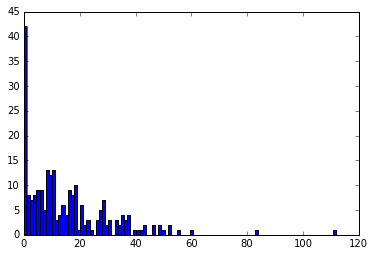

In [49]:
#Same as before but trims leading and ending zeros
plt.hist(np.trim_zeros(getBinnedExecutions(windowLength = 120)), bins = 100)

#KS (Kolmogorov–Smirnov) Test

FROM DOCUMENTATION OF KS TEST (http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html):

"This tests whether 2 samples are drawn from the same distribution. Note that, like in the case of the one-sample K-S test, the distribution is assumed to be continuous. This is the two-sided test, one-sided tests are not implemented. The test uses the two-sided asymptotic Kolmogorov-Smirnov distribution. If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same."

My KS Teset Method

According to this KS test the pvalue is 1.54e-12. This low p value suggests that they are from the same distribution. When I designed this experiment I intended to use this KS test (http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html) It says on their documentation that you can conduct a KS test of any of the Scipy.stats fnctions which includes poisson (http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html#module-scipy.stats). However once I tried to conduct a KS test with a standard poisson distribution I found that it was not supported. 

As a work around I decided to create a random poisson distribution with an equal number of instances as the binned windows. Then used ks_2samp (http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ks_2samp.html) which does a ks of two data distributions.  


Total Executions 3553
startingTime:  29530
EndingTime:  59160
Total Windows:  246


Ks_2sampResult(statistic=0.34042553191489366, pvalue=1.5406836757759065e-12)

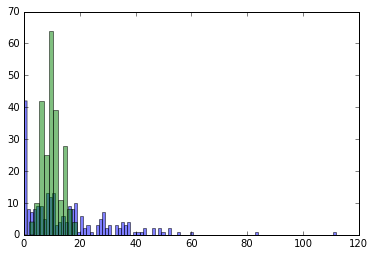

In [74]:
binned120 = np.trim_zeros(getBinnedExecutions(windowLength = 120))
poissonComparison = np.random.poisson(10,len(binned120))
plt.hist(binned120, alpha =.5, bins = 100)
plt.hist(poissonComparison, alpha = .5)
stats.ks_2samp(binned120, poissonComparison)

#Future Improvements

Future improvements would be to either scale this KS test with a larger data set to see if the low p-value holds, or to create a more standard Poisson KS test comparison method. 

Other improvements would be to be more thoughtful about the poisson lambda parameter. I just tweaked the lambda until it matched my binned execution data as closely as possible. 

The highlights of this analysis is that the distribution actually looks quite poisson once bin it properly and ignore the numerous windows with 0 executions. 

Also, this analysis was conducted for LNKD stock which compared to GOOG or MSFT has a much lower trading volume. It would be intersting to see whether or not the distribution follows a poisson distribution more or less with higher volume. 
